# Linear Regression

Linear Regression makes prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (or intercept term).

Linear Regression Equation can be written as:

$\hat{y} = \theta_0 + \theta_{1}x_{1} + \theta_{1}x_{1} + \theta_{n}x_{n} $

where,

$\hat{y}$ is the predicted value

n is the number of features

$x_i$ is the $i^th$ feature value

$\theta_j$ is the $j^th$ model parameter (including the bias teram $\theta_0$ and the feature weights $\theta_1$,$\theta_2$,...,$\theta_n$)

The above equation can be written more concisely using vectorized form

$\hat{y} = h_{\theta}(x) = \theta . x$

where,

$\theta$ is the model's parameter vector containing the bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$

x is the instance's feature vector containing $x_0$ to $x_n$ with $x_0$ always equal to 1.

$\theta.x$ is the dot product of vectors $\theta$ and x which is ofcourse equal to $\theta_{0}x_{0} + \theta_{1}x_{1} + ... + \theta_{n}x_{n}$

$h_\theta$ is the hypothesis function using models parameter $\theta$

**NOTE:**

In ML, vectors are often represented as *column vectors*. If $\theta$ and x $x$ are column vectors then $\hat{y} = \theta^T.x$ where $\theta_T$ is a transpose of $\theta$.

For example:

$$
\theta = \begin{bmatrix}
            \theta_1 \\
            \theta_2 \\
            \theta_3 \\
        \end{bmatrix}


        and \ x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}

        then \ \theta_T = \begin{bmatrix} \theta_1 \theta_2 \theta_3 \end{bmatrix} 
        
\newline

\therefore \theta_T.x = \theta_1.x_1 + \theta_2.x_2 + \theta_3.x_3 
$$

Training model means setting its parameters so that model best fits the training set. For this purpose we need a measure to find how well our model has performed. For Regression common performance model is Root Mean Squared Error (RMSE). Therefore to train a linear regression we need to find value of $\theta$ that minimizes the RMSE. In practice it is simpler to minimize mean square error than RMSE and it leads to same result (because the value that minimizes a function also minimizes its square root).

The MSE of Linear Regression $h_\theta$ on a training set X is:

$$
    MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\theta^{T}x^{(i)} - y^{(i)})^2
$$

## The Normal Equation

To find a value of $\theta$ that minimizes the cost function, there is *closed-form* solution. In other words, a mathematical equation that gives the result directly called normal equation.

$$
    \hat{\theta} = (X^{T}X)^{-1}X^Ty
$$

where,

$\hat{\theta}$ is the $\theta$ that minimizes the cost function

$y$ is the vector of target values containing $y^{(i)} \ to \ y^{(m)}$

Let’s generate some linear-looking data to test this equation on :

In [2]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

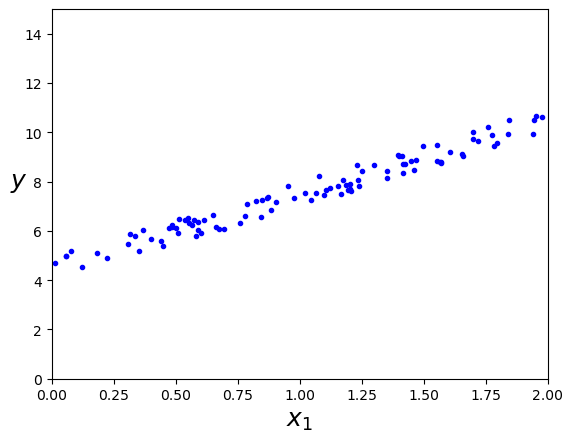

In [3]:
import matplotlib.pyplot as plt

plt.plot(X,y, "b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

Now let's compute $\hat{\theta}$ using the Normal Equation. We will use `inv()` function from Numpy linear algebra module (`np.linalg`) to compute the inverse of matrix and the `dot()` method for matrix multiplication.

In [4]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is $y = 4 + 3x_{1} + Gaussian \ noise$

Let's see what the equation has found


In [5]:
theta_best

array([[4.54494798],
       [2.92847478]])

We would have hoped for $\theta$ = 4 and $\theta$ = 3 instead of $\theta$ = 4.57 and $\theta$ =
2.930. Close enough, but the noise made it impossible to recover the exact
parameters of the original function.

Now we can make predictions using $\hat{\theta}$:

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.54494798],
       [10.40189755]])

Let's plot this model's predictions:

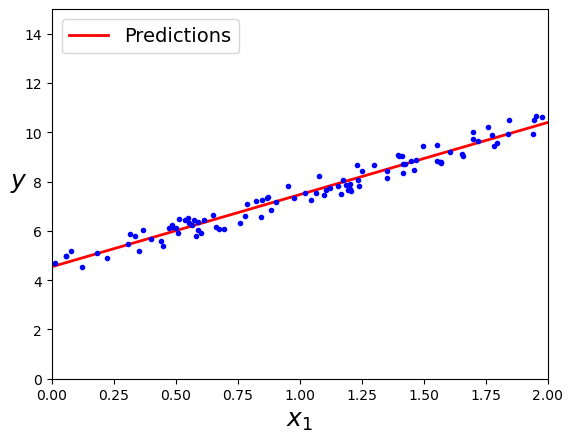

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple:

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_ , lin_reg.coef_

(array([4.54494798]), array([[2.92847478]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.54494798],
       [10.40189755]])

The LinearRegression class is based on the `scipy.linalg.lstsq()` function (the name stands for “least squares”), which you could call directly:

In [10]:
theta_best_svd , residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.54494798],
       [2.92847478]])

This above function computes $\hat{\theta} = X^+y$, where $X^+$ is the *pseudoinverse* of X (specifically, the Moore-Penrose inverse). We can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.54494798],
       [2.92847478]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix **X** into the matrix multiplication of three matrices **U $\sum$ $V^T$** . The pseudoinverse is computed as $\bold{X}^+ = \bold{V\sum}^+\bold{U}^T$ . To compute the matrix $\sum^+$, the algorithm takes $\sum$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the non zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed the Normal Equation may not work if the matrix $X^TX$ is not invertible (i.e., singular), such as if *m < n* or if some features are redundant, but the pseudoinverse is always defined.

The SVD of a n x n matrix A is $U\sum V^T$

where,

U = m x n matrix of orthonomal eigenvectors of $AA^T$

$V^T$ = transpose of n x n matrix containing the orthonormal eigenvectors of $A^TA$

$\sum$ = a n x n diagonal matrix of singular values which are square roots of eigen values of $A^TA$ 

## Gradient Descent

- General idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

- Suppose you are lost in the mountains in dense fog. You can only feel the slope of the ground below your feet. A good strategy to reach to the downhill quickly is to go in the direction of the steepest slope. That's what gradient descent does.

- It measures the local gradient of the error function with regard to parameter $\theta$, and it goes in the direction of decreasing gradient. Once the gradient is zero, we have reached the minimum!

- Concretly we start by filling $\theta$ a random values (this is called *random initializing*). Then we improve it gradually by taking one baby step at a time, each step attempting to decrease the cost function (e.g. MSE), until the algorithm converges to minimium. See figure below

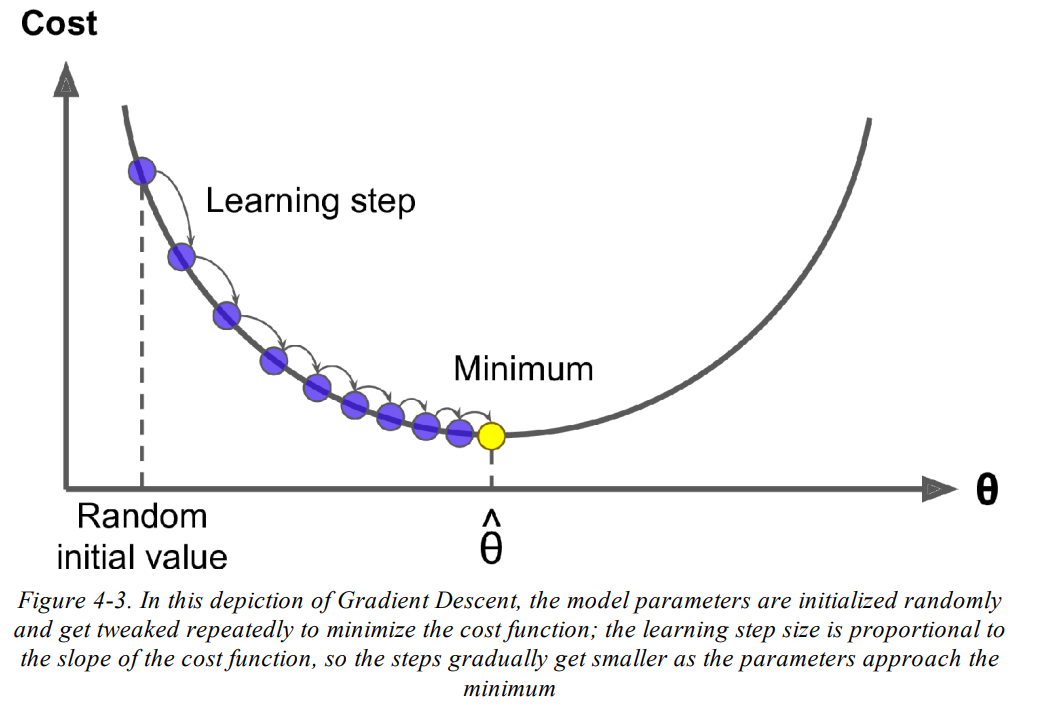